In [1]:
include("../../src/GaPSE.jl");

In [2]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions, Printf, LaTeXStrings

In [3]:
FILE_F_MAP = "../../test/datatest/F_REFERENCE.txt"
FILE_PS = "../../test/datatest/file_pk.txt"
FILE_BACKGROUND = "../../test/datatest/WideA_ZA_background.dat"

z_min = 0.05
z_max = 0.20
θ_max = π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
  k_min = 1e-8, k_max = 10.0,
  Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70,
    N = 1024, fit_min = 0.05, fit_max= 0.5, con=true, s_lim=1.0)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP; expand=false)

GaPSE.parameters_used(stdout, cosmo)


I take the input power spectrum as it is,without expanding.
# The following parameters were used for this computation: 
# CLASS Power Spectrum input file : "../../test/datatest/file_pk.txt"
# F window function input file : "../../test/datatest/F_REFERENCE.txt"
# CLASS Background input file: "../../test/datatest/WideA_ZA_background.dat"
# 	 z_min = 0.05 	 z_max = 0.2
# 	 k_min = 1.0e-8 	 k_max = 10.0
# 	 h_0 = 0.7 	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
# 	 comoving s_min = 148.1920001465757 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.3747095690664 Mpc/h_0
# 	 comoving z_eff = 0.15045636096023224 
# 	 Volume of the survey V_survey = 3.845366167995967e8
# 	 σ_0 = 15.593462966741178
# 	 σ_1 = 15.074895881392285
# 	 σ_2 = 100.85852368830221
# 	 σ_3 = 3735.1227501923527
# 


In [4]:
GaPSE.print_map_ξ_multipole(cosmo, "xi_doppler_L0.txt", "auto_doppler"; 
    use_windows = false, N_μs = 50, N_log=1000)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02



time needed for map_integral_on_mu for auto_doppler [in s] = 2.11649 


In [5]:
tab_pk = readdlm(FILE_PS, comments=true);
ks = convert(Vector{Float64}, tab_pk[:,1]);
k_min, k_max = ks[begin], ks[end]
pks = convert(Vector{Float64}, tab_pk[:,2]);
PK = Spline1D(ks, pks);

In [6]:
my_table = readdlm("xi_doppler_L0.txt", comments=true)
my_ss = convert(Vector{Float64}, my_table[:, 1]);
my_dopplers = convert(Vector{Float64}, my_table[:, 2]);
mattia_table = readdlm("/Users/matteofoglieni/Dropbox/GR_effects/Mattia_Output/Monopoles_without_window/xi_doppler_L0.txt")
mattia_ss = convert(Vector{Float64}, mattia_table[2:end, 1]);
mattia_dopplers = convert(Vector{Float64}, mattia_table[2:end, 2]);

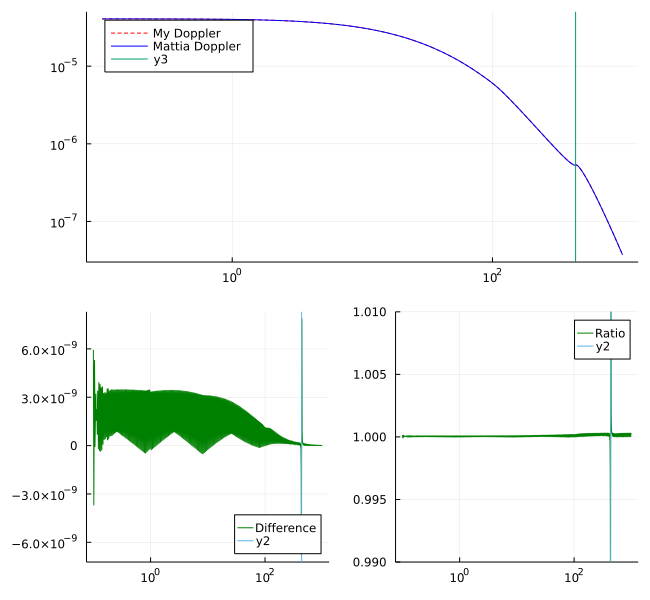

In [7]:
my_xs = my_ss
my_ys = my_dopplers
xs = mattia_ss
ys = mattia_dopplers
spline = Spline1D(xs, ys)

S_VLIM=cosmo.s_eff

p1 = plot([my_xs, xs], [my_ys,  ys], xaxis=:log, yaxis=:log, lc=[:red :blue], 
    label=["My Doppler" "Mattia Doppler"], ls=[:dash :solid], legend=:topleft)
vline!(p1, [S_VLIM])

p2 = plot(my_xs, spline.(my_xs) .- my_ys, 
    xaxis=:log,label="Difference", lc=:green, legend=:bottomright)
vline!(p2, [S_VLIM])

p3 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, xaxis=:log,
    ylim=(0.99,1.01))
vline!(p3, [S_VLIM])

plot(p1, p2, p3, size=(650, 600), layout= @layout [ x ; y z ] )

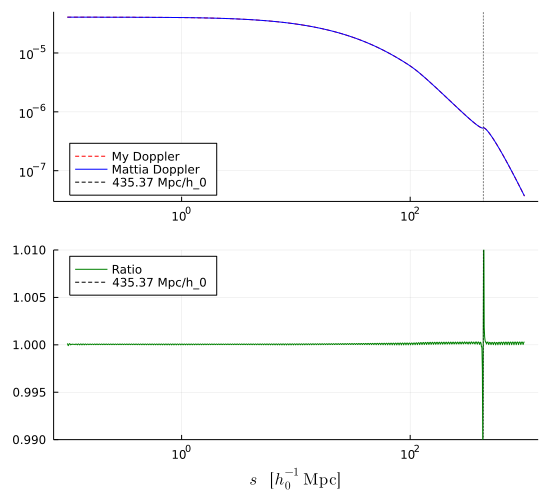

In [8]:
my_xs = my_ss
my_ys = my_dopplers
xs = mattia_ss
ys = mattia_dopplers
spline = Spline1D(xs, ys)

S_VLIM = cosmo.s_eff
S_VLIM_F = @sprintf("%.2f", S_VLIM)

p1 = plot([my_xs, xs], [my_ys,  ys], xaxis=:log, yaxis=:log, lc=[:red :blue], 
    label=["My Doppler" "Mattia Doppler"], ls=[:dash :solid], legend=:bottomleft)
vline!(p1, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

p2 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, xaxis=:log,
    ylim=(0.99,1.01), legend=:topleft, 
    xlabel=L"$s \quad [h_0^{-1}\,\mathrm{Mpc}]$")
vline!(p2, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, lw=0.5, ls=:dash)

P = plot(p1, p2, size=(550, 500), layout= @layout [ x ; z ] )
savefig(P, "xi_AutoDoppler_L0.pdf")
display(P)

In [48]:
calc_xis = [
0.0015770448733659853 , 0.0015770446934413576 , 0.0015769046574335916 , 0.001576708256564702 , 0.0015765209763353143 , 
0.0015762940109665634 , 0.0015760260041978193 , 0.0015757404903597816 , 0.0015753997297115179 , 0.001575012687852116 , 
0.0015745676100586917 , 0.0015740576726835 , 0.0015734724545071713 , 0.0015728027892972936 , 0.0015720356748873737 , 
0.0015711584131151118 , 0.0015701556627011508 , 0.0015690104386566048 , 0.0015677037289215684 , 0.0015662141951079624 , 
0.0015645181305219932 , 0.0015625891344720232 , 0.0015603979409396166 , 0.0015579122313514123 , 0.0015550964695465051 , 
0.001553657510890977 , 0.0015500575440928527 , 0.0015460002014311264 , 0.0015414362350020029 , 0.0015363130282879808 , 
0.0015305747962914003 , 0.0015241629168412498 , 0.0015170162581429473 , 0.001509071589939326 , 0.0015002640605383689 , 
0.0014905276630985368 , 0.0014797956436526571 , 0.0014680007864351504 , 0.001455075373458799 , 0.0014409509309442309 , 
0.001425557794352558 , 0.0014088246825897741 , 0.0013906787004944038 , 0.001371046284764771 , 0.0013498555627934523 , 
0.00132704046520638 , 0.0013025459613611244 , 0.0012763326872728634 , 0.0012483785902976318 , 0.0012186761667744858 , 
0.001187227471065727 , 0.0011540432492164626 , 0.0011191509703726919 , 0.0010826059179637182 , 0.0010444907041420202 , 
0.0010049029572932664 , 0.0009639558430583941 , 0.0009185476727050515 , 0.0008755657521267602 , 0.0008317155210268496 , 
0.0007872019695385467 , 0.00074224318684646 , 0.0006970734093041149 , 0.0006519371434991387 , 0.0006070876156520586 , 
0.0005627802444226876 , 0.0005192400067518917 , 0.000476734227841399 , 0.0004355184789714674 , 0.0003958210402462019 , 
0.00035785392904299823 , 0.00032181381869996763 , 0.00028789082123517064 , 0.0002558889809821566 , 0.00022632577260177356 , 
0.00019705357176651606 , 0.00016880189742718405 , 0.0001426918323972112 , 0.000121193879595682 , 0.00010350592668354365 , 
8.733389858144901e-5 , 7.305388665893922e-5 , 5.989266671820478e-5 , 4.9415792111192116e-5 , 4.0226379226794414e-5 , 
3.2484056461215046e-5 , 2.5156213737664057e-5 , 2.1602639367048713e-5 , 1.8365496271954366e-5 , 1.3956578992739019e-5 , 
1.0482913624068556e-5 , 7.877288304611768e-6 , 5.841644658563307e-6 , 3.7030516361229935e-6 , 2.1068008410541553e-6 , 
1.2242124615881545e-6 , 6.35468652242852e-7 , 2.7851191376504384e-7 , 8.555204769654919e-8 , 9.11854858672545e-10 , 
]
xis = [
4.058409835906719e-5 , 4.058432011750143e-5 , 4.058096368701013e-5 , 4.0576179512525354e-5 , 4.0571654878221104e-5 , 
4.0566135977506345e-5 , 4.055959028761368e-5 , 4.055262606660798e-5 , 4.0544274862999545e-5 , 4.05347704474434e-5 , 
4.052381358452298e-5 , 4.0511232212575515e-5 , 4.0496761967753236e-5 , 4.0480171095981206e-5 , 4.046112944885679e-5 , 
4.043931506119803e-5 , 4.0414338325057826e-5 , 4.0385767741827456e-5 , 4.035312008712583e-5 , 4.031585274290655e-5 , 
4.027336265557301e-5 , 4.022497799485637e-5 , 4.016995379051388e-5 , 4.0107467164810024e-5 , 4.0036613142035165e-5 , 
3.995683114999256e-5 , 3.986624587027299e-5 , 3.976407047424645e-5 , 3.9649052702342096e-5 , 3.951985480320762e-5 , 
3.937505876058866e-5 , 3.921317488915172e-5 , 3.903265031974045e-5 , 3.883187960916858e-5 , 3.86092170023459e-5 , 
3.836298835364236e-5 , 3.809150145933677e-5 , 3.779305311542442e-5 , 3.746592764879231e-5 , 3.710838980999071e-5 , 
3.671867286326996e-5 , 3.629496684384994e-5 , 3.583541789635183e-5 , 3.533815212854306e-5 , 3.480133622806923e-5 , 
3.4223283654735084e-5 , 3.3602589899337156e-5 , 3.293825156413249e-5 , 3.222970717564044e-5 , 3.147676263484633e-5 , 
3.06794585272962e-5 , 2.9838045798542477e-5 , 2.895319486528703e-5 , 2.8026284833762512e-5 , 2.705938859117852e-5 , 
2.605494760039667e-5 , 2.5015785072894288e-5 , 2.3945505219996517e-5 , 2.2848293429488446e-5 , 2.1728641496807788e-5 , 
2.059172266065244e-5 , 1.9443032130502452e-5 , 1.8288473412973277e-5 , 1.7134205589091445e-5 , 1.598660870747348e-5 , 
1.4852115817845014e-5 , 1.3737180682160373e-5 , 1.2648129589611943e-5 , 1.1591054195833617e-5 , 1.0571720595145105e-5 , 
9.595502088191353e-6 , 8.667418060822114e-6 , 7.792391734570977e-6 , 6.9749572540626265e-6 , 6.210752829598366e-6 , 
5.471559489961209e-6 , 4.750410171568406e-6 , 4.078954335523599e-6 , 3.479204602682838e-6 , 2.955348410944907e-6 , 
2.5032300857269497e-6 , 2.1159669446645762e-6 , 1.7859714369503168e-6 , 1.5062106930821347e-6 , 1.270563541871931e-6 , 
1.0729360699334007e-6 , 9.08033090928611e-7 , 7.716896656498474e-7 , 6.609658199229764e-7 , 5.754321679096601e-7 , 
5.358910107443911e-7 , 4.731438166745373e-7 , 3.7050366155381146e-7 , 2.788066652200629e-7 , 2.0504910948391071e-7 , 
1.4847651135484737e-7 , 1.0626844894217568e-7 , 7.535523256855079e-8 , 5.301722783524861e-8 , 3.7042928814848375e-8 , 
];

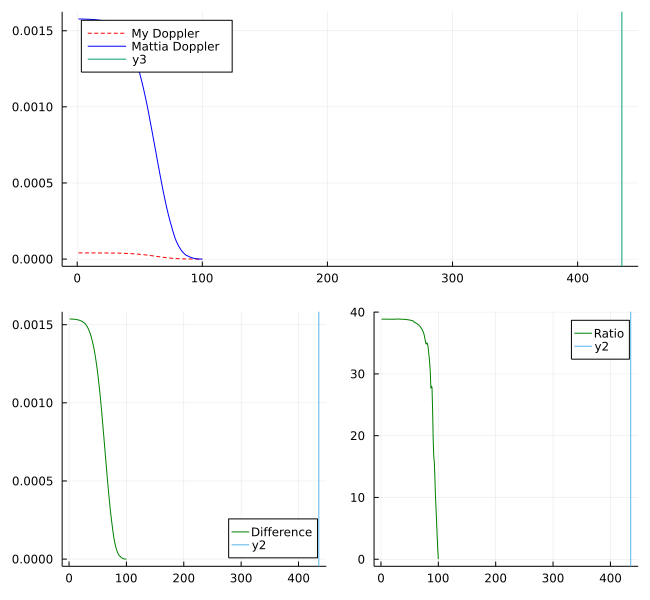

In [52]:
my_xs = 1:100
my_ys = xis
xs = 1:100
ys = calc_xis
spline = Spline1D(xs, ys)

S_VLIM=cosmo.s_eff

p1 = plot([my_xs, xs], [my_ys,  ys], #xaxis=:log, yaxis=:log, 
    lc=[:red :blue], 
    label=["My Doppler" "Mattia Doppler"], ls=[:dash :solid], legend=:topleft)
vline!(p1, [S_VLIM])

p2 = plot(my_xs, spline.(my_xs) .- my_ys, 
    #xaxis=:log,
    label="Difference", lc=:green, legend=:bottomright)
vline!(p2, [S_VLIM])

p3 = plot(my_xs, spline.(my_xs) ./ my_ys, label="Ratio", lc=:green, #xaxis=:log,
    )#ylim=(0.99,1.01))
vline!(p3, [S_VLIM])

plot(p1, p2, p3, size=(650, 600), layout= @layout [ x ; y z ] )